In [1]:
import pandas as pd
import os

In [19]:
print(f"pandas=={pd.__version__}")

pandas==2.2.3


## Carga de datos

Cargar multiples CSV en un mismo DataFrame de pandas, concatenados uno encima de otro

In [2]:
# Listar los archivos del csv del directorio spotify usando os
file_names = os.listdir('../Data/spotify')
file_names

['1990.csv',
 '1950.csv',
 '1980.csv',
 '2000.csv',
 '2010.csv',
 '1970.csv',
 '1960.csv']

In [3]:
# Bucle for para cargar uno a uno en pandas, luego concat para unirlos en un dataframe

df = pd.DataFrame() # dataframe vacío donde ir concatenando cada dataframe

for file_name in file_names:
    df_file = pd.read_csv('../Data/spotify/' + file_name)
    print(file_name, df_file.shape)
    df = pd.concat([df, df_file], ignore_index=True)
    
print(f"df final: {df.shape}")
    

1990.csv (88, 15)
1950.csv (73, 15)
1980.csv (105, 15)
2000.csv (100, 15)
2010.csv (100, 15)
1970.csv (104, 15)
1960.csv (97, 15)
df final: (667, 15)


In [4]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,2,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76
2,3,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76
3,4,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74
4,5,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74


In [5]:
# Revisar concatenado en un rango especifico
df.iloc[75:79]

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
75,76,Real Real Gone,Van Morrison,classic rock,1990,142,85,70,-7,19,95,221,38,3,56
76,77,King Of My Castle - Roy Malone's King Mix,Wamdue Project,disco house,2009,125,54,87,-9,6,76,299,4,8,55
77,78,Be With You,Enrique Iglesias,dance pop,1999,122,87,68,-5,5,54,219,4,3,55
78,79,Ain't That Just the Way,Lutricia McNeal,NaN,1996,174,65,74,-9,19,77,215,6,22,55


In [11]:
# Renombrar la columna pop a popularity
df = df.rename(columns = {
    'pop' : 'popularity',
    'nrgy' : 'energy'
    })
df.head(2)

,Number,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,2,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76


In [18]:
# Ver la cantidad ed datos nulos
df.isnull().sum()

Number        0
title         0
artist        0
top genre     0
year          0
bpm           0
energy        0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [15]:
# Opcion 1: Rellenar los nulos de la columna con la palafra "undefined"
df['top genre'].fillna('undefined', inplace=True)


In [14]:
# Opcion 2: Rellenar los nulos de la columna con la moda de esa columna
# moda_top_genre = df['top genre'].mode().iloc[0] # Miramos la moda de la columna
# df['top genre'].fillna('moda_top_genre', inplace=True)

'dance pop'

In [ ]:
# Opcion 3: Rellenar con la moda de los artistas concretos para los que 'top genre' es null
import numpy as np

def mode(x):
    if not x.mode().empty:
        return x.mode().iloc[0]
    else:
        return np.nan
    
artist_genre_mode = df.groupby('artist')['top genre'].agg(mode) 
artist_genre_mode

artist
 Wind & Fire                        disco
*NSYNC                           boy band
5 Seconds of Summer              boy band
50 Cent                east coast hip hop
ABBA                              europop
                              ...        
ZAYN                            dance pop
ZZ Top                         album rock
Zara Larsson                    dance pop
Zedd                           complextro
gnash                                 pop
Name: top genre, Length: 469, dtype: object

In [ ]:
# NO FUNCIONA Y AQUE LOS ARTISTAS TIENEN TODAS LAS CELDAS DE TOP GENRE EN NULL
# Continuacion opcion 3 Dara error porque esta ya realizadas las opciones de arriba
top_genre_mode = df['top genre'].mode().iloc[0] # Moda global de top genre sin importar artista

def top_genre_with_mode(row):
    if pd.insa(row['top genre']):
        # Si es nulo devolvemos la moda de top genre del artista
        # Si no existe artista asigna la moda global
        # Si existe el artista asigna la moda de top genre de ese artista
        return artist_genre_mode.get(row['artist'], df['top genre'].mode().iloc[0])
    else:
        # Si no es nulo lo devolvemos como esta
        return row['top genre']
df['top genre'] = df.apply(top_genre_with_mode, axis=1)

In [16]:
# Ver duplicados y borrarlos
df.duplicated().sum()
# Hay 0

# Para borralos
df.drop_duplicates(inplace=True)

np.int64(0)

In [23]:
# Borrar columna numbers
df.drop('Number', axis=1, inplace=True)

In [25]:
df.head(2)

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79
1,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76


In [30]:
# Ordenamos por años
# Con inplace no hace falta crear un dataframe donde guardarlo, lo guarda en el mismo
df.sort_values('year', inplace=True)
df.reset_index(drop=True, inplace=True) # Aqui reseteamos el indice al nuevo orde que hemos hecho arriba
df.head(2)

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62


<Axes: >

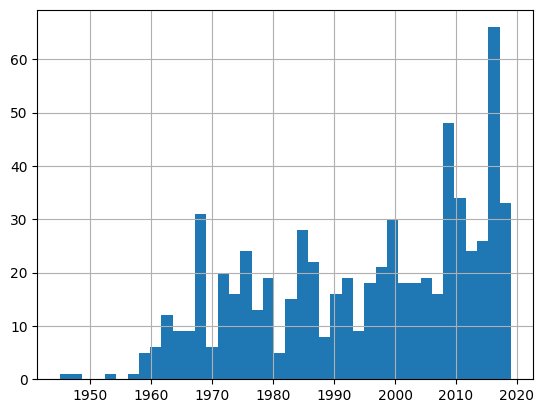

In [ ]:
# Visualizaciones sobre las columnas (grafico barras)
df['year'].hist() # Histograma
df['year'].hist(bins=40)# Histograma con 40 barras

<Axes: >

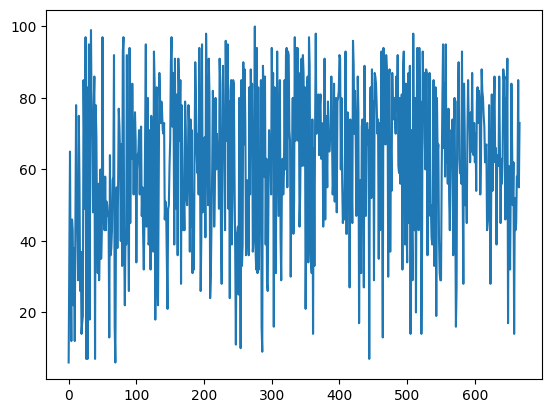

In [34]:
# Visualizaciones grafico de lineas
df['energy'].plot()

In [37]:
# mostrar artistas mas repetidos en dataframe, usando value_counts
pd.DataFrame(df['artist'].value_counts()).head(5)# Muestra los 5 primeros

,count
artist,
Elton John,12
Queen,11
ABBA,9
The Beatles,7
Whitney Houston,6


In [43]:
# Mostrar la cancion mas popular (idxmax e idxmin)
# df['popularity'].idxmax() Posicion de la cancion mas popular

df.iloc[df['popularity'].idxmax()]

title               bad guy
artist        Billie Eilish
top genre        electropop
year                   2019
bpm                     135
energy                   43
dnce                     70
dB                      -11
live                     10
val                      56
dur                     194
acous                    33
spch                     38
popularity               94
Name: 660, dtype: object

In [48]:
df.iloc[df['popularity'].idxmin()]

title         Held for Questioning
artist                Rusty Draper
top genre     deep adult standards
year                          1953
bpm                            109
energy                          65
dnce                            70
dB                              -2
live                            14
val                             85
dur                            146
acous                           79
spch                             3
popularity                      26
Name: 2, dtype: object

In [53]:
# Cancion mas popular de un año
# se hace con goupby
cancion_mas_popular_por_anio = df.loc[df.groupby('year')['popularity'].idxmax()]
cancion_mas_popular_por_anio

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
5,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,40,79,134,61,7,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,83
578,Starboy,The Weeknd,canadian contemporary r&b,2016,186,59,68,-7,14,49,230,14,28,84
606,Thunder,Imagine Dragons,modern rock,2017,168,82,61,-5,15,29,187,1,4,85
651,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88


In [56]:
# Crear columna decada a partir de columna año
df['decade'] = df['year'] // 10 * 10 # Con // hacemos division entera sin decimales
df.head(1)

,title,artist,top genre,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity,decade
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52,1940


In [61]:
# Movemos la columna decada a una posicion concreta
# Obtener la posicion de la columna year ( par aponerla al lado)
print(df.columns)
pos = df.columns.get_loc('year')
pos

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'energy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'popularity', 'decade'],
      dtype='object')


3

In [62]:
# Sacar la columna decada con pop()
serie_decade = df.pop('decade')

# Insertar la columna decada en la posicion obtenida
df.insert(pos, 'decade', serie_decade)

In [63]:
df.head(1)

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1940,1945,77,6,50,-16,10,33,169,97,5,52


In [64]:
# Agrupamos por decada para sacar la cancion mas popular por decada 
filtro = df.groupby('decade')['popularity'].idxmax()
df.iloc[filtro]

,title,artist,top genre,decade,year,bpm,energy,dnce,dB,live,val,dur,acous,spch,popularity
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1940,1948,177,34,42,-11,72,78,123,86,4,62
8,A Teenager In Love,Dion & The Belmonts,adult standards,1950,1959,79,38,56,-9,13,62,158,67,3,60
73,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1960,1969,129,54,56,-10,18,39,186,3,3,82
124,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1970,1975,71,40,41,-10,30,22,354,27,5,84
179,Africa,TOTO,album rock,1980,1982,93,37,67,-18,5,73,296,26,3,83
335,No Scrubs,TLC,atl hip hop,1990,1999,93,68,74,-4,7,59,214,3,10,79
353,In the End,Linkin Park,alternative metal,2000,2000,105,86,56,-6,21,40,217,1,6,83
660,bad guy,Billie Eilish,electropop,2010,2019,135,43,70,-11,10,56,194,33,38,94


In [68]:
# Calcular duracion media por año
print(df.groupby('year')['dur'].mean())

year
1945    169.000000
1948    123.000000
1953    146.000000
1957    174.000000
1958    144.500000
           ...    
2015    215.000000
2016    202.541667
2017    208.666667
2018    214.000000
2019    194.733333
Name: dur, Length: 66, dtype: float64


<Axes: xlabel='year'>

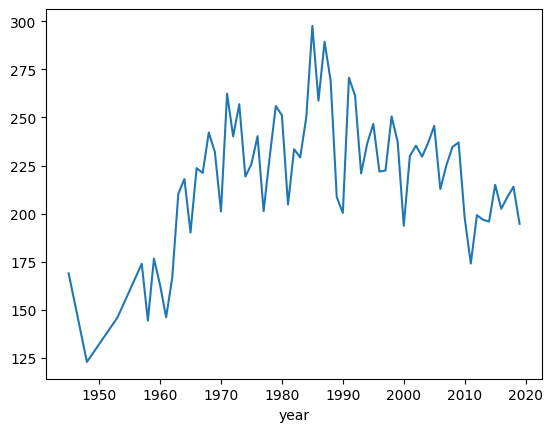

In [67]:
# Calcular duracion media por año y mostrarla con un plot
df.groupby('year')['dur'].mean().plot()